<center>

# __Introduction to Qiskit simulators__

November 14, 2023

<br>

__Herramientas de la Computación Cuántica__

__Máster en Ciencia y Tecnologías de Información Cuántica (MQIST)__

<br>

Diego Alvarez-Estevez, PhD.

_Centro de Investigación en Tecnologías de la Información y las Comunicaciones (CITIC)_

_Universidade da Coruña_

</center>

# 1. Introduction

Qiskit supports running quantum circuits on a wide variety of quantum simulators and (real) devices

These simulators or devices can be run either locally or remotely (e.g. IBM Quantum platform)

Access to these resources is mediated through the use of different **"providers"**

Examples of providers:

-**BasicAer**: provides access to basic local simulators. These simulators are implemented in Python and therefore ideal only for learning purposes and not for high-performance use cases.

-**Aer**: provides access to high-performance local simulators. These simulators are implemented in C++ and are made available in the Aer module in Qiskit. It includes capabilities for realistic noise models simulations.

-**IBM Provider**: provides access to remote systems (real hardware) and simulators hosted at the <a href=https://www.ibm.com/quantum>IBM Quantum platform</a>.

-**IBM Runtime Provider**: provides managed services with native support to Qiskit Primitives. It allows users to use optimized workloads and efficiently execute them on quantum systems at scale.

-**Third party**: including a variety of non-IBM quantum hardware providers and other related quantum cloud services. In fact, one could eventually implement its own Qiskit-compatible provider by extending the <a href=https://qiskit.org/documentation/apidoc/providers.html>Providers Interface</a>.

For a complete overview check https://qiskit.org/providers

Regarless of the specific provider, <u>the involved steps</u> for running a quantum circuit are:

1. Identify the appropriate provider (e.g. BasicAer, Aer, or a quantum device provider). A provider's purpose is to get "backend" objects that enable executing circuits on a quantum simulator or device

2. Obtain a reference to the desired backend from the provider. A backend provides the interface between Qiskit and the hardware or simulator that will execute the implemented quantum circuits. Each provider might grant access to several specific types of backends. 

3. Using the chosen backend, run the circuit on the corresponding simulator or device. This returns an object that represents the job in which the circuit is being run.

4. Interact with the job object for purposes such as checking status, and getting its result after running completion

In [1]:
import qiskit.tools.jupyter

import sys
print(sys.executable)

%qiskit_version_table

/home/jvazquez/miniconda3/envs/basic-quantum/bin/python


# 2. BasicAer

In [2]:
from qiskit import BasicAer

print(BasicAer.backends())

[<QasmSimulatorPy('qasm_simulator')>, <StatevectorSimulatorPy('statevector_simulator')>, <UnitarySimulatorPy('unitary_simulator')>]


A reference to the desired backend may be obtained by calling the provider's ```get_backend()``` method as shown in the following subsection.

## 2.1. Using the BasicAer qasm_simulator backend

Its main purpose is to run a circuit <u>and hold its measurement outcomes</u>

In [3]:
from qiskit import QuantumCircuit, BasicAer, transpile

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all() # 1
qc.draw()
#qc.draw("mpl") # check use of "settings.conf"

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [4]:
backend = BasicAer.get_backend("qasm_simulator") # 2

tqc = transpile(qc, backend) # 3
job = backend.run(tqc, shots=1000) # 4

result = job.result() # 5
counts = result.get_counts(tqc) # 6

<span style="color:red">PRACTICE:</span>  Try to predict the result of this circuit before its execution

In [5]:
# Uncomment when ready to check the output
#print(counts) # 7

Let’s take a closer look at some relevant lines in the previous example:

1. The BasicAer qasm_simulator backend is <u>useful for circuits that contain measurement instructions.</u> Notice we have not added any classical registers to our circuit, yet somehow they are included. <span style="color:red">PRACTICE:</span> Check documentation of <a href=https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure_all>measure_all()</a> and experiment with the ```add_bits``` and ```inplace``` flags.

In [6]:
# Placeholder for experiments

2. A reference to the qasm_simulator backend (implemented by the <a href="https://qiskit.org/documentation/stubs/qiskit.providers.basicaer.QasmSimulatorPy.html">QasmSimulatorPy class</a>) is obtained.

In [7]:
#type(backend)

3. The circuit is transpiled with the ```transpile()``` function to use only gates available on the BasicAer qasm_simulator. <span style="color:red">CHECKPOINT:</span> _what is the point of transpiling a simulator?_

4. The transpiled circuit and number of shots to perform is passed to the ```run()``` method of the BasicAer qasm_simulator backend. The ```run()``` method returns a <a href=https://qiskit.org/documentation/stubs/qiskit.providers.basicaer.BasicAerJob.html#qiskit.providers.basicaer.BasicAerJob>BasicAerJob</a> instance. <span style="color:red">CHECKPOINT:</span> _[execute()](https://qiskit.org/documentation/apidoc/execute.html) vs [run()](https://qiskit.org/documentation/stubs/qiskit.providers.BackendV1.html#qiskit.providers.BackendV1.run)_


In [8]:
#type(job)

5. The result of running the circuit (held in a <a href=https://qiskit.org/documentation/stubs/qiskit.result.Result.html#qiskit.result.Result>qiskit.Result</a> instance) is obtained with the ```result()``` method of the BasicAerJob
instance.

In [9]:
#type(result)

6. A Python dictionary containing the measurement outcomes per basis state is obtained with the ```get_counts()``` method of the Result instance.

7. The measurement outcomes are printed in the output

## 2.2. Using the BasicAer statevector_simulator backend

Its main purpose is to run a circuit <u>and hold its resultant statevector</u>

/home/jvazquez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


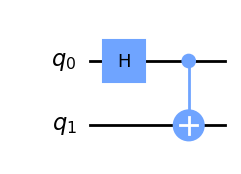

In [10]:
from qiskit import QuantumCircuit, BasicAer, transpile

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw("mpl") # 1

In [11]:
backend = BasicAer.get_backend("statevector_simulator") # 2

# Execute the circuit
tqc = transpile(qc, backend)
job = backend.run(tqc) # 1

result = job.result() # 3
statevector = result.get_statevector(tqc) # 4

In [12]:
# We expect to get the statevector corresponding to the analytic solution obtained in previous exercise
# Notice statevector follows the following ordering: |00>, |01>, |10>, |11>
print(statevector) 

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [13]:
from qiskit.visualization import array_to_latex
array_to_latex(statevector)

<IPython.core.display.Latex object>

Some remarks:

1. Because measurement instructions collapse quantum states, the BasicAer ```statevector_simulator``` backend is <u>most useful for
circuits without measurement instructions</u>. The ```statevector_simulator``` is "one-shot", meaning if there are measurements you could get a different statevector each time. <span style="color:red">PRACTICE</span>: add measurements to preceding circuit and check this result


In [14]:
# Fill in here with your code


2. A reference to the ```statevector_simulator``` backend (implemented by the <a href=https://qiskit.org/documentation/stubs/qiskit.providers.basicaer.StatevectorSimulatorPy.html#qiskit.providers.basicaer.StatevectorSimulatorPy>StatevectorSimulatorPy class</a>) is obtained


In [15]:
type(backend)

qiskit.providers.basicaer.statevector_simulator.StatevectorSimulatorPy


3. As in previous example, the ```run()``` method gets the transpiled circuit and executes it in the ```BasicAer statevector_simulator``` backend returning a ```BasicAerJob``` instance. The result of the running circuit is obtained invoking the corresponding ```result()``` method returning a ```qiskit.Result``` object

4. A list of complex probability amplitudes that express the statevector is obtained with the ```get_statevector()``` method (as a ```numpy array```)

In [16]:
type(statevector)

numpy.ndarray

Another way to visualize/manipulate statevectors, without having to use ```statevector_simulator``` backend of BasicAer, is to rely on the [Statevector class](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector) included in the [Quantum Information module](https://qiskit.org/documentation/apidoc/quantum_info.html):

In [17]:
from qiskit.quantum_info import Statevector

# Create a ket_00 state using array input
ket_00 = Statevector([1,0,0,0])

display(ket_00)
#display(ket_00.draw('latex'))

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [18]:
# Now we "evolve" our state through our circuit
output_sv = ket_00.evolve(qc)

# And show the results
display(output_sv.draw('latex'))

<IPython.core.display.Latex object>

In [19]:
# Double check it is what we actually expected it to be
from qiskit.visualization import array_to_latex
array_to_latex(output_sv)

<IPython.core.display.Latex object>

<span style="color:red">PRACTICE:</span>  Consider now the following single-qubit circuit. Try to predict the result of this circuit before its execution, then use Qiskit to check the result (use your favourite method to visualize the output statevector)

/home/jvazquez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


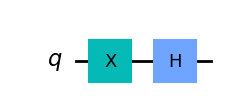

In [20]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw("mpl")

In [21]:
# Write here your solution

<span style="color:red">EXERCISE:</span>  Do the same, now considering the following 3-qubit circuit

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.draw("mpl")

In [ ]:
# Write here your solution

## 2.3. Using the BasicAer unitary_simulator backend

Its main purpose is to run a circuit <u>and hold a unitary matrix that represents the circuit</u>. That is, the unitary transformation that relates the input to the output produced by the circuit in question.

In [ ]:
from qiskit import QuantumCircuit, BasicAer, transpile

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw("mpl") # 1

In [ ]:
backend = BasicAer.get_backend("unitary_simulator") # 2

tqc = transpile(qc, backend)
job = backend.run(tqc)

result = job.result() # 3
unitary = result.get_unitary(tqc)

<span style="color:red">PRACTICE:</span>  Try to predict the result of this circuit before its execution

In [ ]:
# Uncomment when ready to check the output
#print(unitary)

In [ ]:
# Improve visualization using latex format
from qiskit.visualization import array_to_latex

#array_to_latex(unitary)

Remarks:

1. The BasicAer ```unitary_simulator``` backend is <u>ONLY useful for circuits without measurement or reset instructions</u>, as they are not supported by the ```unitary_simulator```. <span style="color:red">PRACTICE:</span> add measurements/resets to preceding circuit and check this statement

In [ ]:
# Fill in here with your code



2. A reference to the ```unitary_simulator``` backend (implemented by the <a href=https://qiskit.org/documentation/stubs/qiskit.providers.basicaer.UnitarySimulatorPy.html#qiskit.providers.basicaer.UnitarySimulatorPy>UnitarySimulatorPy class</a>) is obtained

3. As in previous cases, the ```run()``` method gets the transpiled circuit and executes it in the corresponding backend returning a ```BasicAerJob``` object. The ```result()``` method is used to access the resulting ```qiskit.Result``` object

4. A square matrix of complex numbers that express the circuit's unitary matrix is obtained with the ```get_unitary()``` method (as a ```numpy ndarray```)

In [ ]:
type(backend)

In [ ]:
type(unitary)

<span style="color:red">EXERCISE:</span>  Consider now the following circuit. Obtain the analytical solution, and then use Qiskit to check the output unitary

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.x([0,1])
qc.z(0)
qc.draw("mpl")

In [ ]:
# Write here your solution